In [148]:
import numpy as np

def my_func(x,y):
    return np.exp(5*np.abs(x-5)+5*np.abs(y-5))

N = 10000
fX = np.random.rand(1,N)
fY = np.random.rand(1,N)
X = my_func(fX,fY)
print('Mean is:', str(np.mean(X)))
print('Variance is:', str(2*np.std(X)/np.sqrt(N)))

# stratified sampling
K = 20
XSb = np.zeros((K,K))
SS = np.zeros_like(XSb)
Nij = N/np.power(K,2)

for i in range(0,K):
    for j in range(0,K):
        XS = my_func((i+np.random.rand(1,int(Nij)))/K,(j+np.random.rand(1,int(Nij)))/K)
        XSb[i][j] = np.mean(XS)
        SS[i][j] = np.var(XS)

SST = np.mean((SS/N))
SSM = np.mean((XSb))
print('Mean with stratified sampling is:', str(SSM))
print('Variance is:', str(2*np.sqrt(SST)))

# importance sampling
# N_is = 1000
U = np.random.rand(1,N)
X11 = np.log(1+(np.exp(1)-1)*U)
U1 = np.random.rand(1,N)
Y11 = np.log(1+(np.exp(1)-1)*U1)
T = np.power((np.exp(1)-1),2)*np.exp((5*np.abs(X11-5)+5*np.abs(Y11-5)) - (X11+Y11))
print('Mean is:',str(np.mean(T)))
print('Variance is:', str(2*np.std(T)/np.sqrt(N)))

Mean is: 2.005319890117076e+20
Variance is: 9.540546945244938e+18
Mean with stratified sampling is: 2.0461819207578803e+20
Variance is: 1.0272052504254033e+18
Mean is: 2.0807035459468617e+20
Variance is: 1.6338431535197448e+19


In [165]:
import numpy as np
import math

def my_func(x,y):
    return 4*np.cos((math.pi)+5*(x+y))

N = 1000000
fX = 2*np.random.rand(1,N)-1
fY = 2*np.random.rand(1,N)-1
X = my_func(fX,fY)
print('Mean is:', str(np.mean(X)))
print('Variance is:', str(2*np.std(X)/np.sqrt(N)))

# stratified sampling
K = 10
XSb = np.zeros((K,K))
SS = np.zeros_like(XSb)
Nij = N/np.power(K,2)

for i in range(0,K):
    for j in range(0,K):
        XS = my_func(2*(i+np.random.rand(1,int(Nij)))/K,(j+np.random.rand(1,int(Nij)))/K-1)

#         XS = my_func(2*(i+np.random.rand(1,int(Nij)))/K,(j+np.random.rand(1,int(Nij)))/K)
        XSb[i][j] = np.mean(XS)
        SS[i][j] = np.var(XS)

SST = np.mean((SS/N))
SSM = np.mean((XSb))
print('Mean with stratified sampling is:', str(SSM))
print('Variance is:', str(2*np.sqrt(SST)))

# importance sampling

U1=np.random.rand(2,N);
Y22 = np.log(1+(np.exp(1)-1)*U1)-1
T = np.power((np.exp(1)-1),2)*(np.cos(math.pi+sum(5*Y22))*np.exp(-sum(Y22)))
print('Mean is:',str(np.mean(T)))
print('Variance is:', str(2*np.std(T)/np.sqrt(N)))

Mean is: -0.14907988022707255
Variance is: 0.005656764035413391
Mean with stratified sampling is: -0.14735571003015044
Variance is: 0.0017837123023606344
Mean is: -0.13168759775743485
Variance is: 0.01121973816100847


In [20]:
import math
import numpy as np

number_sample=10000;
X_value=np.ones(3)
output=[];
print(X_value)
for k in range(number_sample):
    index = math.ceil(3*np.random.rand())
    sum1 = sum(X_value)-X_value[index-1]
    X_value[index-1] = max((15-sum1),0)-(np.log(np.random.rand())/index)
    output.append(sum1+index*X_value[index-1])
print(X_value)
print('Mean is:',str(np.mean(output)))
print('Variance is:', str(2*np.std(output)/np.sqrt(number_sample)))

[1. 1. 1.]
[13.44838112  1.57730245  0.29201788]
Mean is: 16.718658740724678
Variance is: 0.028605478165608357


In [28]:
import math
import numpy as np

number_sample=10000;
X_value=np.ones(3)
output=[];
print(X_value)
for k in range(number_sample):
    index = math.ceil(3*np.random.rand())
    sum1 = sum(X_value)-X_value[index-1]
    X_value[index-1] = min((1-sum1),0)-(np.log(np.random.rand())/index)
    output.append(sum1+index*X_value[index-1])
print(X_value)
print('Mean is:',str(np.mean(output)))
print('Variance is:', str(2*np.std(output)/np.sqrt(number_sample)))

[1. 1. 1.]
[0.18294761 0.93033906 0.5061739 ]
Mean is: 0.9580441215115565
Variance is: 0.030863348538970638


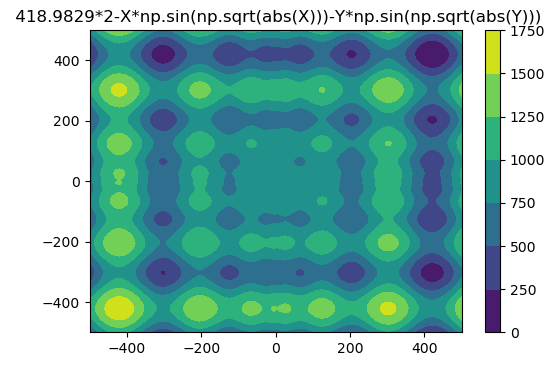

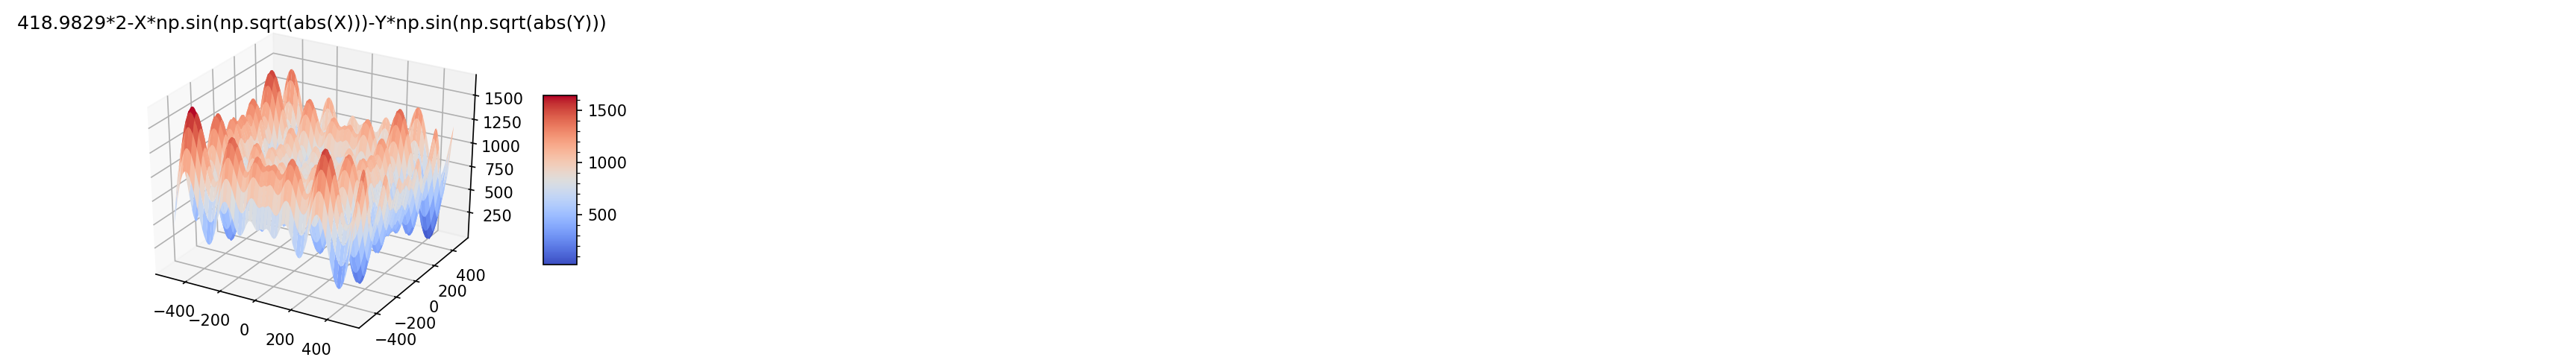

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

N_r = 500
x = np.linspace(-N_r,N_r,100)
y = np.linspace(-N_r,N_r,100)
X, Y = np.meshgrid(x, y)
Z = 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))

plt.figure(num=None,dpi=100)
plt.contourf(X,Y,Z)
plt.title(' 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))')
plt.colorbar()
plt.show()


cplot = plt.figure(num=None,dpi=150)
ax = cplot.add_subplot(111,projection='3d')
surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)
cbar = cplot.colorbar(surf, shrink=0.5, aspect=5)
cbar.minorticks_on()
plt.title(' 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))')
plt.show()

Best result: 24.846698727609066 at x: 425.568540453318 at y: 407.61753613956375
109


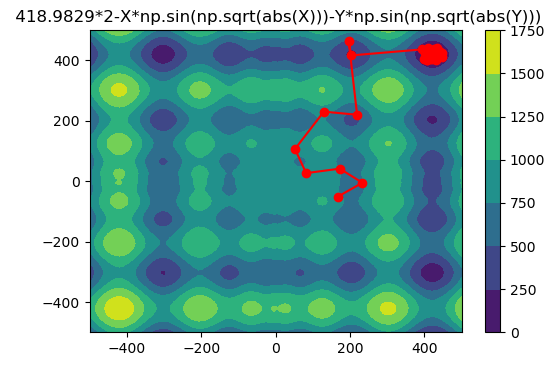

(array([6.045e+03, 2.900e+01, 1.200e+01, 0.000e+00, 2.600e+01, 1.300e+01,
        0.000e+00, 0.000e+00, 3.000e+00, 5.000e+00]),
 array([1.70822433e-01, 8.82487823e+01, 1.76326742e+02, 2.64404702e+02,
        3.52482662e+02, 4.40560622e+02, 5.28638582e+02, 6.16716542e+02,
        7.04794502e+02, 7.92872461e+02, 8.80950421e+02]),
 <a list of 10 Patch objects>)

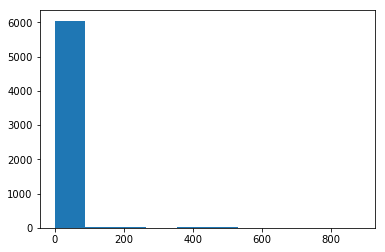

In [87]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

N_r = 500
x = np.linspace(-N_r,N_r,100)
y = np.linspace(-N_r,N_r,100)
X, Y = np.meshgrid(x, y)
Z = 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))

plt.figure(num=None,dpi=100)
plt.contourf(X,Y,Z)
plt.title(' 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))')
plt.colorbar()


def question3_func(X,Y):
    return 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))

X=[0,0];
number_iternation = 10000;
T=100;
path=[];
save_min=[];
for t in range(1,number_iternation):
    X_next = X +100*np.random.normal(0,1,2);
#     print(X_next)
    if(X_next[0]<-500 or X_next[1]<-500 or X_next[0]>500 or X_next[1]>500):
        continue
    else:
        delta = question3_func(X_next[0],X_next[1]) -question3_func(X[0],X[1]);
        alpha = np.exp(-delta/T);
        if(delta<0):
            X=X_next
            path.append(X);
        else:
            if(np.random.uniform(0,1)<alpha):
                X=X_next
                path.append(X);
        T=100/(np.log(t+1));
    save_min.append(question3_func(X[0],X[1]))

x_coord_f=[];
y_coord_f=[];
print('Best result:',str(question3_func(X[0],X[1])),'at x:',str(X[0]),'at y:',str(X[1]))
print(len(path))


for i in range(len(path)):
    x_coord_f.append(path[i][0])  
    y_coord_f.append(path[i][1])



plt.plot(x_coord_f, y_coord_f, '-ro')
plt.show()
plt.hist(save_min)

C:\Users\qidi\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\qidi\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in double_scalars


Best result: 0.0020828339997933654 at x: 420.898320118005 at y: 421.0752568103391
15


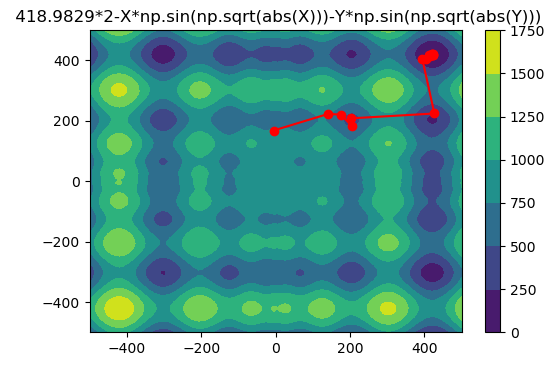

(array([6.029e+03, 1.800e+01, 0.000e+00, 3.600e+01, 0.000e+00, 2.900e+01,
        3.400e+01, 2.100e+01, 0.000e+00, 3.000e+00]),
 array([2.08283400e-03, 7.76623246e+01, 1.55322566e+02, 2.32982808e+02,
        3.10643050e+02, 3.88303291e+02, 4.65963533e+02, 5.43623775e+02,
        6.21284017e+02, 6.98944258e+02, 7.76604500e+02]),
 <a list of 10 Patch objects>)

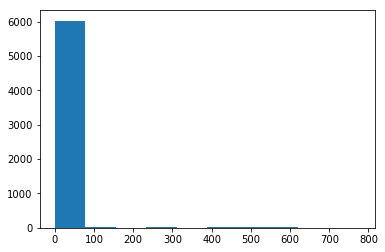

In [84]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

N_r = 500
x = np.linspace(-N_r,N_r,100)
y = np.linspace(-N_r,N_r,100)
X, Y = np.meshgrid(x, y)
Z = 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))

plt.figure(num=None,dpi=100)
plt.contourf(X,Y,Z)
plt.title(' 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))')
plt.colorbar()


def question3_func(X,Y):
    return 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))

X=[0,0];
number_iternation = 10000;
T=100;
path=[];
save_min=[];
for t in range(1,number_iternation):
    X_next = X +100*np.random.normal(0,1,2);
#     print(X_next)
    if(X_next[0]<-500 or X_next[1]<-500 or X_next[0]>500 or X_next[1]>500):
        continue
    else:
        delta = question3_func(X_next[0],X_next[1]) -question3_func(X[0],X[1]);
        alpha = np.exp(-delta/T);

        if(delta<0):
            X=X_next
            path.append(X);
        else:
            if(np.random.uniform(0,1)<alpha):
                X=X_next
                path.append(X);
        T=100*(np.exp(-0.01*np.sqrt(t)**t));

    save_min.append(question3_func(X[0],X[1]))

x_coord_f=[];
y_coord_f=[];
print('Best result:',str(question3_func(X[0],X[1])),'at x:',str(X[0]),'at y:',str(X[1]))
print(len(path))

for i in range(len(path)):
    x_coord_f.append(path[i][0])  
    y_coord_f.append(path[i][1])



plt.plot(x_coord_f, y_coord_f, '-ro')
plt.show()
plt.hist(save_min)

Best result: 32.22883007205547 at x: 436.85819178224233 at y: 418.8324278025815
77


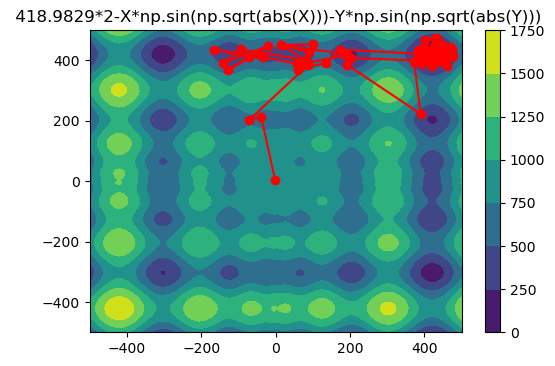

(array([351., 131.,  63.,  24.,  50.,  30.,  11.,   5.,   4.,   2.]),
 array([  5.82518658,  88.86686792, 171.90854927, 254.95023062,
        337.99191197, 421.03359332, 504.07527466, 587.11695601,
        670.15863736, 753.20031871, 836.24200006]),
 <a list of 10 Patch objects>)

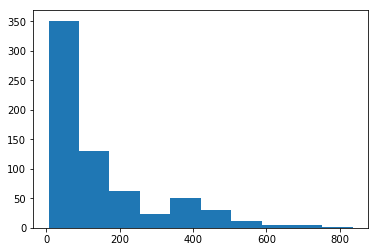

In [68]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

N_r = 500
x = np.linspace(-N_r,N_r,100)
y = np.linspace(-N_r,N_r,100)
X, Y = np.meshgrid(x, y)
Z = 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))

plt.figure(num=None,dpi=100)
plt.contourf(X,Y,Z)
plt.title(' 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))')
plt.colorbar()


def question3_func(X,Y):
    return 418.9829*2-X*np.sin(np.sqrt(abs(X)))-Y*np.sin(np.sqrt(abs(Y)))

X=[0,0];
number_iternation = 1000;
T=100;
path=[];
save_min=[];
for t in range(1,number_iternation):
    X_next = X +100*np.random.normal(0,1,2);
#     print(X_next)
    if(X_next[0]<-500 or X_next[1]<-500 or X_next[0]>500 or X_next[1]>500):
        continue
    else:
        delta = question3_func(X_next[0],X_next[1]) -question3_func(X[0],X[1]);
        alpha = np.exp(-delta/T);
        if(delta<0):
            X=X_next
            path.append(X);
        else:
            if(np.random.uniform(0,1)<alpha):
                X=X_next
                path.append(X);
        T=100-(100/number_iternation)*t;
    save_min.append(question3_func(X[0],X[1]))

x_coord_f=[];
y_coord_f=[];
print('Best result:',str(question3_func(X[0],X[1])),'at x:',str(X[0]),'at y:',str(X[1]))
print(len(path))


for i in range(len(path)):
    x_coord_f.append(path[i][0])  
    y_coord_f.append(path[i][1])



plt.plot(x_coord_f, y_coord_f, '-ro')
plt.show()
plt.hist(save_min)

48
Initial path length: 61429.00146461519


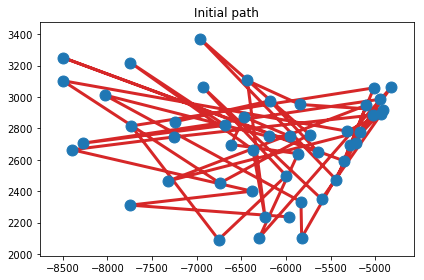

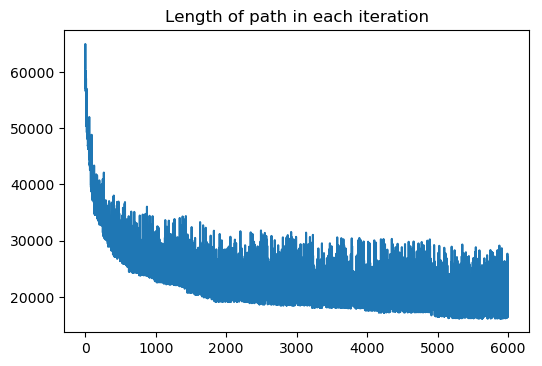

[ 3 25  1 38 24  2  0  8 19 30 43 27 36 18 26 16 42  5 29  7 21 15 40 28
 33 13 22 39 14 17  6 35 45 32 37 11 10 46 12 20 31 23 44 34  9 41  4 47]


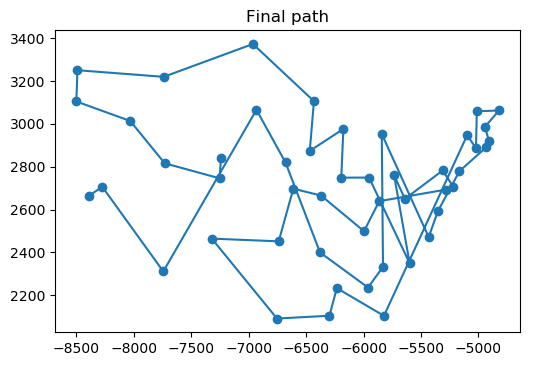

In [7]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.utils.random import sample_without_replacement
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
N_cities = 48


cities_coord = [];
# print(cities_coord[0])
# print(cities_coord[0][0])
with open('uscap_xy.txt') as f:
    for line in f: # read rest of lines
        cities_coord.append([float(x) for x in line.split()])
cities_coord=np.delete(cities_coord, 10, 0)
cities_coord=np.delete(cities_coord, 1, 0)

print(len(cities_coord))

# distance matrix: euclidean dist between every point
dist_mat = pairwise_distances(cities_coord, cities_coord, metric='euclidean')

# Parameters
num_iter = 6000 # number of iterations
c = 200
# a = 0.5
p = np.arange(0,N_cities) # Initial path p

# find path length for path p
p_len = 0; # initial length of path
for a1 in range(0,N_cities-1):
    p_len = p_len + distance.euclidean(cities_coord[a1],cities_coord[a1+1])
print('Initial path length:',str(p_len))

# Save the paths and lengths
pathHistory = np.zeros((num_iter,N_cities))
lenHistory = []
thresh_ar = []

# plot cities and initial path
plt.figure()
x_coord = cities_coord[:,0]
y_coord = cities_coord[:,1]
plt.plot(x_coord, y_coord, 'C3', zorder=1, lw=3)
plt.scatter(x_coord, y_coord, s=120, zorder=2)
plt.title('Initial path')
plt.tight_layout()
plt.show()

iter_count = 0;
p2 = []
while iter_count < num_iter:
    iter_count = iter_count + 1;
    swap_i, swap_j = np.random.choice(N_cities, 2)
    p2 = np.copy(p)
    # swap the two cities of the path
    p2[swap_i], p2[swap_j] = p2[swap_j], p2[swap_i]
    # new path length
    p_len2 = 0
    for a1 in range(0,N_cities-1):
        p_len2 = p_len2 + distance.euclidean(cities_coord[p2[a1]],cities_coord[p2[a1+1]])
    thresh = (1+iter_count)**((p_len - p_len2)/c)
    # change paths if new path is shorter than previous
    if p_len2 - p_len <= 0:
        p = np.copy(p2)
        p_len = np.copy(p_len2)
    else:
        if np.random.rand() <= thresh:
            p = np.copy(p2)
            p_len = np.copy(p_len2)
    # bookeeping
    pathHistory[iter_count-1][0:len(p2)] = p2
    lenHistory.append(p_len2)
    thresh_ar.append(thresh)

plt.figure(num=None,dpi=100)
plt.plot(lenHistory)
plt.title('Length of path in each iteration')
plt.show()

# print(pathHistory[-1,:].astype(int))
# print(pathHistory[-2,:].astype(int))

# ind_f = pathHistory[-1,:].astype(int)
for i in range(num_iter):
    if(pathHistory[-1-i,:].astype(int)[0]==3):
        ind_f=pathHistory[-1-i,:].astype(int)
        break;
print(ind_f)
x_coord_f = cities_coord[ind_f,0]
y_coord_f = cities_coord[ind_f,1]
plt.figure(num=None,dpi=100)
plt.title('Final path')
plt.plot(x_coord_f, y_coord_f, '-o')
plt.show()